Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [22]:
import pandas as pd
import numpy as np

Read files

In [23]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56841,ZWE,Africa,Zimbabwe,2020-12-24,12786.0,130.0,131.429,339.0,9.0,3.571,860.261,8.747,8.843,22.808,0.606,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1870.0,204892.0,13.785,0.126,1697.0,0.114,0.077,12.9,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56842,ZWE,Africa,Zimbabwe,2020-12-25,12880.0,94.0,119.000,341.0,2.0,3.571,866.586,6.324,8.006,22.943,0.135,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,206592.0,13.900,0.114,1632.0,0.110,0.073,13.7,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56843,ZWE,Africa,Zimbabwe,2020-12-26,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1184.0,207776.0,13.979,0.080,1576.0,0.106,0.074,13.6,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56844,ZWE,Africa,Zimbabwe,2020-12-27,13077.0,114.0,107.429,349.0,8.0,4.143,879.840,7.670,7.228,23.481,0.538,0.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,208791.0,14.048,0.068,1414.0,0.095,0.076,13.2,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56846 entries, 0 to 56845
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            56520 non-null  object 
 1   continent                           56178 non-null  object 
 2   location                            56846 non-null  object 
 3   date                                56846 non-null  object 
 4   total_cases                         56289 non-null  float64
 5   new_cases                           56283 non-null  float64
 6   new_cases_smoothed                  55327 non-null  float64
 7   total_deaths                        48064 non-null  float64
 8   new_deaths                          48063 non-null  float64
 9   new_deaths_smoothed                 55327 non-null  float64
 10  total_cases_per_million             55963 non-null  float64
 11  new_cases_per_million               55957

In [25]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
include_uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53438,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53439,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53440,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53441,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53442,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53766,GBR,Europe,United Kingdom,2020-12-24,2195144.0,39148.0,34410.857,69732.0,575.0,511.714,32335.737,576.673,506.892,1027.193,8.470,7.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,1.18,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53767,GBR,Europe,United Kingdom,2020-12-25,2227947.0,32803.0,35017.000,70302.0,570.0,523.143,32818.945,483.207,515.821,1035.589,8.396,7.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53768,GBR,Europe,United Kingdom,2020-12-26,2262735.0,34788.0,36094.000,70513.0,211.0,476.571,33331.392,512.447,531.685,1038.697,3.108,7.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53769,GBR,Europe,United Kingdom,2020-12-27,2295228.0,32493.0,35581.000,70860.0,347.0,479.571,33810.032,478.641,524.129,1043.809,5.112,7.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [26]:
uk_newdeath = pd.DataFrame({'date':include_uk.date , 'new_cases': include_uk.new_cases, 'new_deaths': include_uk.new_deaths}).reset_index()
uk_newdeath

,index,date,new_cases,new_deaths
0,53438,2020-01-31,2.0,NaN
1,53439,2020-02-01,0.0,NaN
2,53440,2020-02-02,0.0,NaN
3,53441,2020-02-03,6.0,NaN
4,53442,2020-02-04,0.0,NaN
...,...,...,...,...
328,53766,2020-12-24,39148.0,575.0
329,53767,2020-12-25,32803.0,570.0
330,53768,2020-12-26,34788.0,211.0
331,53769,2020-12-27,32493.0,347.0


Rename columns

In [27]:
uk_newdeath.rename(columns={'date':'ds', 'new_cases': 'add1', 'new_deaths': 'y'}, inplace=True)
uk_newdeath

,index,ds,add1,y
0,53438,2020-01-31,2.0,NaN
1,53439,2020-02-01,0.0,NaN
2,53440,2020-02-02,0.0,NaN
3,53441,2020-02-03,6.0,NaN
4,53442,2020-02-04,0.0,NaN
...,...,...,...,...
328,53766,2020-12-24,39148.0,575.0
329,53767,2020-12-25,32803.0,570.0
330,53768,2020-12-26,34788.0,211.0
331,53769,2020-12-27,32493.0,347.0


Graph time series

Text(0, 0.5, 'y')

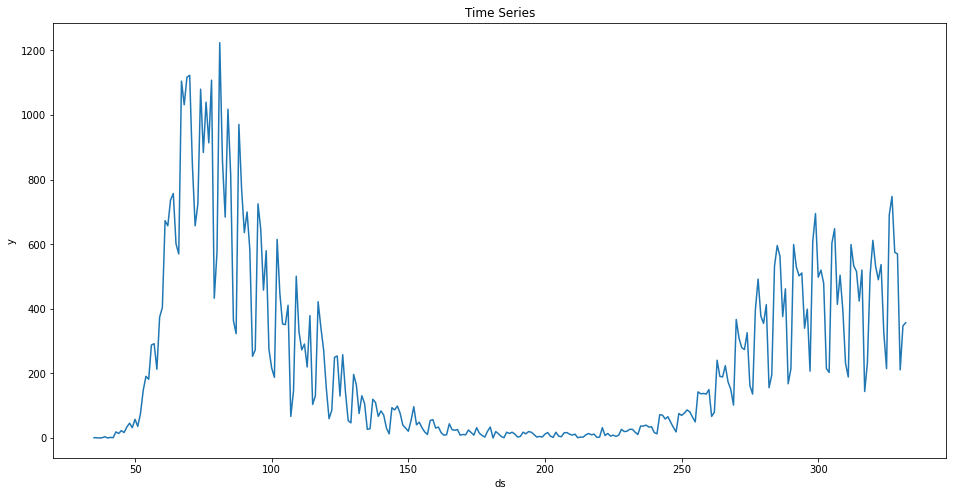

In [28]:
import matplotlib.pyplot as plt

uk_newdeath['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Split time series

In [29]:
month = '2021-01'

test = pd.DataFrame({
    'date': pd.date_range(
        start = pd.Timestamp(month),                        
        end = pd.Timestamp(month) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
test

,date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07
7,2021-01-08
8,2021-01-09
9,2021-01-10


In [30]:
test['new_case'] = uk_newdeath.add1.max()
test

,date,new_case
0,2021-01-01,41460.0
1,2021-01-02,41460.0
2,2021-01-03,41460.0
3,2021-01-04,41460.0
4,2021-01-05,41460.0
5,2021-01-06,41460.0
6,2021-01-07,41460.0
7,2021-01-08,41460.0
8,2021-01-09,41460.0
9,2021-01-10,41460.0


In [31]:
test.rename(columns={'date':'ds', 'new_case': 'add1'}, inplace=True)
test

,ds,add1
0,2021-01-01,41460.0
1,2021-01-02,41460.0
2,2021-01-03,41460.0
3,2021-01-04,41460.0
4,2021-01-05,41460.0
5,2021-01-06,41460.0
6,2021-01-07,41460.0
7,2021-01-08,41460.0
8,2021-01-09,41460.0
9,2021-01-10,41460.0


In [32]:
X_train = uk_newdeath.loc[uk_newdeath["ds"]<"2020-12-15"]
X_val  = uk_newdeath.loc[uk_newdeath["ds"]>="2020-12-15"]
X_test = test.loc[test["ds"]>="2021-01-01"]

FB Prophet

In [33]:
from fbprophet import Prophet

model = Prophet()
model.add_regressor('add1')
model.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict on validation set

In [34]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-15,-46.509671,79.458800,607.964251,-46.509671,-46.509671,310.130667,310.130667,310.130667,398.033284,398.033284,398.033284,310.130667,310.130667,310.130667,87.902617,87.902617,87.902617,0.0,0.0,0.0,351.523613
1,2020-12-16,-47.533689,224.692358,749.887554,-47.533689,-47.533689,484.547506,484.547506,484.547506,536.106952,536.106952,536.106952,484.547506,484.547506,484.547506,51.559446,51.559446,51.559446,0.0,0.0,0.0,488.573263
2,2020-12-17,-48.557707,449.165182,969.026317,-48.601396,-48.521325,749.683905,749.683905,749.683905,758.302523,758.302523,758.302523,749.683905,749.683905,749.683905,8.618618,8.618618,8.618618,0.0,0.0,0.0,709.744816
3,2020-12-18,-49.581725,303.292390,816.120209,-49.712890,-49.474446,569.022160,569.022160,569.022160,596.182780,596.182780,596.182780,569.022160,569.022160,569.022160,27.160619,27.160619,27.160619,0.0,0.0,0.0,546.601055
4,2020-12-19,-50.605743,228.117211,752.829957,-50.864612,-50.398998,535.050911,535.050911,535.050911,537.448615,537.448615,537.448615,535.050911,535.050911,535.050911,2.397703,2.397703,2.397703,0.0,0.0,0.0,486.842872
5,2020-12-20,-51.629760,346.862491,865.359287,-52.015812,-51.353631,763.987589,763.987589,763.987589,671.810289,671.810289,671.810289,763.987589,763.987589,763.987589,-92.177299,-92.177299,-92.177299,0.0,0.0,0.0,620.180529
6,2020-12-21,-52.653778,288.060807,825.551675,-53.198821,-52.224017,697.470277,697.470277,697.470277,612.008572,612.008572,612.008572,697.470277,697.470277,697.470277,-85.461705,-85.461705,-85.461705,0.0,0.0,0.0,559.354794
7,2020-12-22,-53.677796,564.904281,1076.222121,-54.413639,-53.052670,785.935451,785.935451,785.935451,873.838069,873.838069,873.838069,785.935451,785.935451,785.935451,87.902617,87.902617,87.902617,0.0,0.0,0.0,820.160273
8,2020-12-23,-54.701814,571.166313,1114.672040,-55.645959,-53.905736,849.576479,849.576479,849.576479,901.135925,901.135925,901.135925,849.576479,849.576479,849.576479,51.559446,51.559446,51.559446,0.0,0.0,0.0,846.434111
9,2020-12-24,-55.725832,530.575581,1042.406439,-56.894188,-54.701655,843.383398,843.383398,843.383398,852.002017,852.002017,852.002017,843.383398,843.383398,843.383398,8.618618,8.618618,8.618618,0.0,0.0,0.0,796.276185


In [35]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

234.4011860551888


In [36]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,predicted
0,506.0,351
1,612.0,488
2,532.0,709
3,490.0,546
4,537.0,486
5,326.0,620
6,215.0,559
7,691.0,820
8,748.0,846
9,575.0,796


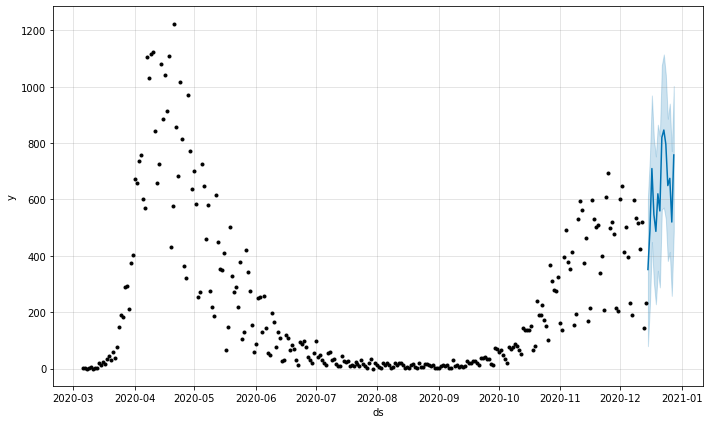

In [37]:
fig1 = model.plot(forecast)

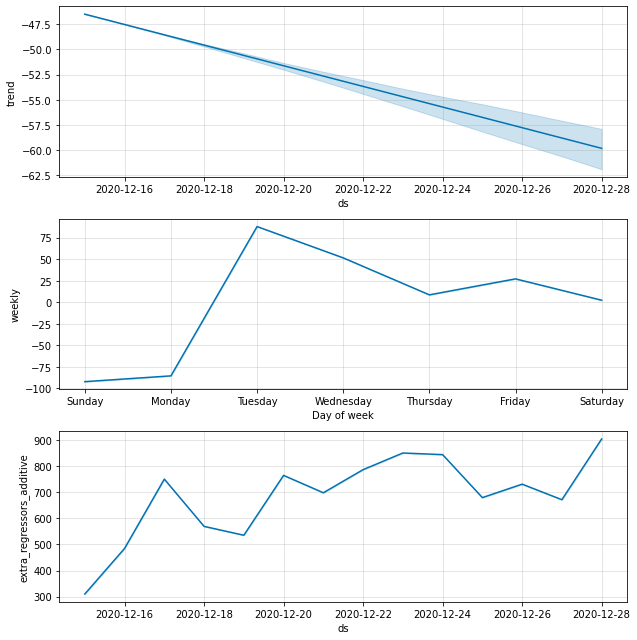

In [38]:
fig2 = model.plot_components(forecast)

In [39]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [40]:
plot_components_plotly(model, forecast)

Predict on test set

In [41]:
prediction = model.predict(X_test)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,-63.917974,613.889495,1119.907788,-66.966992,-60.901254,903.29303,903.29303,903.29303,930.453650,930.453650,930.453650,903.29303,903.29303,903.29303,27.160619,27.160619,27.160619,0.0,0.0,0.0,866.535676
1,2021-01-02,-64.941992,578.228468,1090.991399,-68.364704,-61.570738,903.29303,903.29303,903.29303,905.690734,905.690734,905.690734,903.29303,903.29303,903.29303,2.397703,2.397703,2.397703,0.0,0.0,0.0,840.748742
2,2021-01-03,-65.966010,489.446818,1000.408465,-69.709676,-62.270357,903.29303,903.29303,903.29303,811.115731,811.115731,811.115731,903.29303,903.29303,903.29303,-92.177299,-92.177299,-92.177299,0.0,0.0,0.0,745.149721
3,2021-01-04,-66.990027,487.162098,998.805561,-71.057800,-62.977054,903.29303,903.29303,903.29303,817.831326,817.831326,817.831326,903.29303,903.29303,903.29303,-85.461705,-85.461705,-85.461705,0.0,0.0,0.0,750.841298
4,2021-01-05,-68.014045,651.265885,1167.180080,-72.485042,-63.665577,903.29303,903.29303,903.29303,991.195648,991.195648,991.195648,903.29303,903.29303,903.29303,87.902617,87.902617,87.902617,0.0,0.0,0.0,923.181603
5,2021-01-06,-69.038063,621.246361,1150.300367,-73.803884,-64.384902,903.29303,903.29303,903.29303,954.852476,954.852476,954.852476,903.29303,903.29303,903.29303,51.559446,51.559446,51.559446,0.0,0.0,0.0,885.814413
6,2021-01-07,-70.062081,584.059025,1088.939164,-75.079445,-65.006329,903.29303,903.29303,903.29303,911.911649,911.911649,911.911649,903.29303,903.29303,903.29303,8.618618,8.618618,8.618618,0.0,0.0,0.0,841.849568
7,2021-01-08,-71.086099,596.403348,1102.469539,-76.433916,-65.599900,903.29303,903.29303,903.29303,930.453650,930.453650,930.453650,903.29303,903.29303,903.29303,27.160619,27.160619,27.160619,0.0,0.0,0.0,859.367551
8,2021-01-09,-72.110116,568.839287,1094.735751,-77.896195,-66.336994,903.29303,903.29303,903.29303,905.690734,905.690734,905.690734,903.29303,903.29303,903.29303,2.397703,2.397703,2.397703,0.0,0.0,0.0,833.580617
9,2021-01-10,-73.134134,464.294445,983.488287,-79.345273,-66.950449,903.29303,903.29303,903.29303,811.115731,811.115731,811.115731,903.29303,903.29303,903.29303,-92.177299,-92.177299,-92.177299,0.0,0.0,0.0,737.981597


In [42]:
prediction.yhat[prediction.yhat < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.yhat.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-01-01,866
1,2021-01-02,840
2,2021-01-03,745
3,2021-01-04,750
4,2021-01-05,923
5,2021-01-06,885
6,2021-01-07,841
7,2021-01-08,859
8,2021-01-09,833
9,2021-01-10,737


In [44]:
df_out = forecast.append(prediction)
df_out

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-15,-46.509671,79.458800,607.964251,-46.509671,-46.509671,310.130667,310.130667,310.130667,398.033284,398.033284,398.033284,310.130667,310.130667,310.130667,87.902617,87.902617,87.902617,0.0,0.0,0.0,351.523613
1,2020-12-16,-47.533689,224.692358,749.887554,-47.533689,-47.533689,484.547506,484.547506,484.547506,536.106952,536.106952,536.106952,484.547506,484.547506,484.547506,51.559446,51.559446,51.559446,0.0,0.0,0.0,488.573263
2,2020-12-17,-48.557707,449.165182,969.026317,-48.601396,-48.521325,749.683905,749.683905,749.683905,758.302523,758.302523,758.302523,749.683905,749.683905,749.683905,8.618618,8.618618,8.618618,0.0,0.0,0.0,709.744816
3,2020-12-18,-49.581725,303.292390,816.120209,-49.712890,-49.474446,569.022160,569.022160,569.022160,596.182780,596.182780,596.182780,569.022160,569.022160,569.022160,27.160619,27.160619,27.160619,0.0,0.0,0.0,546.601055
4,2020-12-19,-50.605743,228.117211,752.829957,-50.864612,-50.398998,535.050911,535.050911,535.050911,537.448615,537.448615,537.448615,535.050911,535.050911,535.050911,2.397703,2.397703,2.397703,0.0,0.0,0.0,486.842872
5,2020-12-20,-51.629760,346.862491,865.359287,-52.015812,-51.353631,763.987589,763.987589,763.987589,671.810289,671.810289,671.810289,763.987589,763.987589,763.987589,-92.177299,-92.177299,-92.177299,0.0,0.0,0.0,620.180529
6,2020-12-21,-52.653778,288.060807,825.551675,-53.198821,-52.224017,697.470277,697.470277,697.470277,612.008572,612.008572,612.008572,697.470277,697.470277,697.470277,-85.461705,-85.461705,-85.461705,0.0,0.0,0.0,559.354794
7,2020-12-22,-53.677796,564.904281,1076.222121,-54.413639,-53.052670,785.935451,785.935451,785.935451,873.838069,873.838069,873.838069,785.935451,785.935451,785.935451,87.902617,87.902617,87.902617,0.0,0.0,0.0,820.160273
8,2020-12-23,-54.701814,571.166313,1114.672040,-55.645959,-53.905736,849.576479,849.576479,849.576479,901.135925,901.135925,901.135925,849.576479,849.576479,849.576479,51.559446,51.559446,51.559446,0.0,0.0,0.0,846.434111
9,2020-12-24,-55.725832,530.575581,1042.406439,-56.894188,-54.701655,843.383398,843.383398,843.383398,852.002017,852.002017,852.002017,843.383398,843.383398,843.383398,8.618618,8.618618,8.618618,0.0,0.0,0.0,796.276185


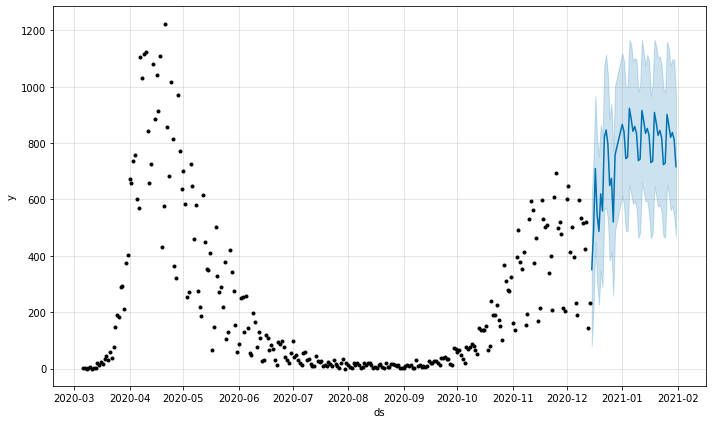

In [45]:
fig1 = model.plot(df_out)

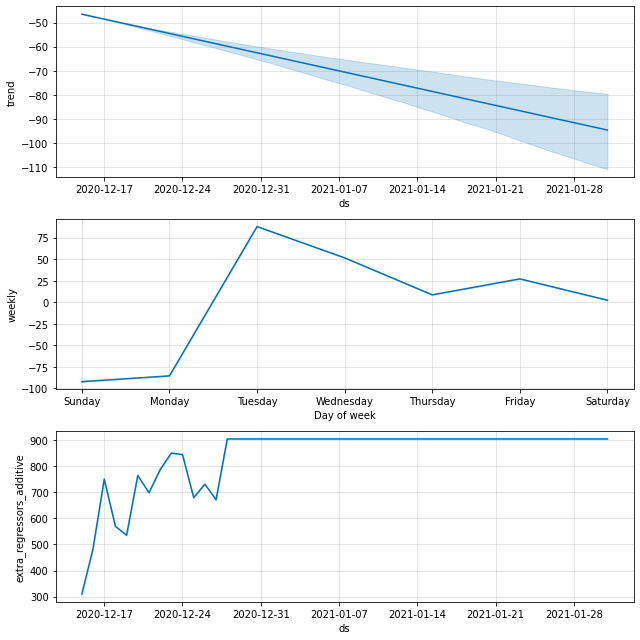

In [46]:
fig2 = model.plot_components(df_out)

In [47]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, df_out)

In [48]:
plot_components_plotly(model, df_out)

Statsmodels

Naive approach

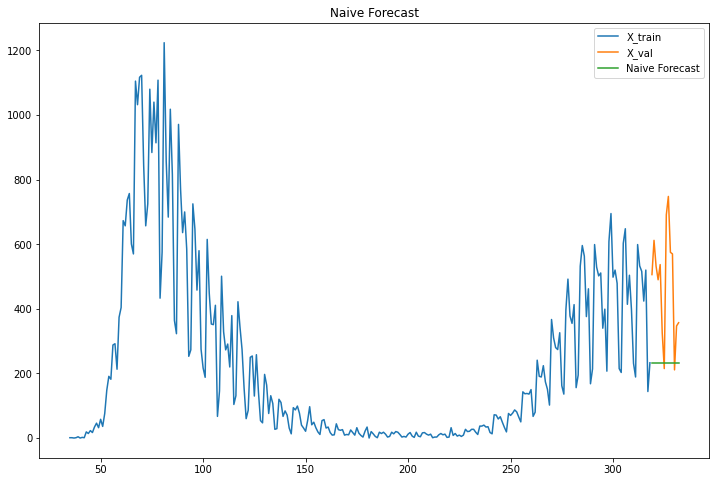

In [49]:
#naive approach
dd= np.asarray(X_train.y) 
y_hat = X_val.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [50]:
y_hat

,index,ds,add1,y,naive
319,53757,2020-12-15,18569.0,506.0,233.0
320,53758,2020-12-16,25300.0,612.0,233.0
321,53759,2020-12-17,35532.0,532.0,233.0
322,53760,2020-12-18,28560.0,490.0,233.0
323,53761,2020-12-19,27249.0,537.0,233.0
324,53762,2020-12-20,36084.0,326.0,233.0
325,53763,2020-12-21,33517.0,215.0,233.0
326,53764,2020-12-22,36931.0,691.0,233.0
327,53765,2020-12-23,39387.0,748.0,233.0
328,53766,2020-12-24,39148.0,575.0,233.0


In [51]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val.y, y_hat.naive)) 
print(rms)

293.9128879690132


Moving Average

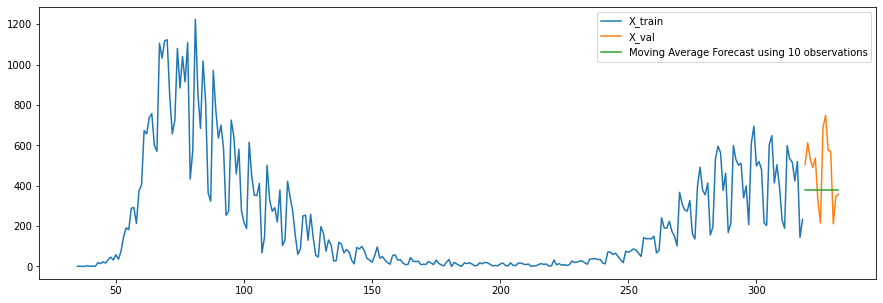

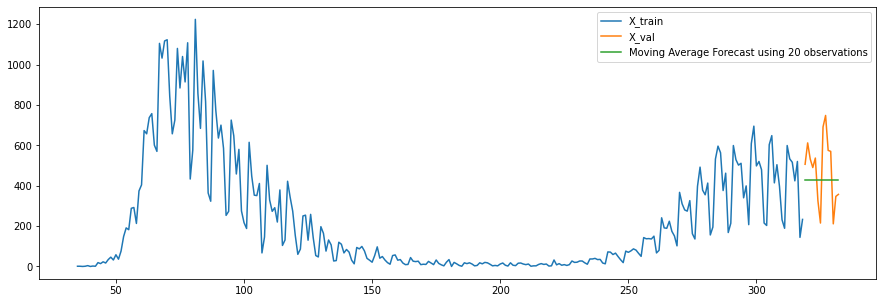

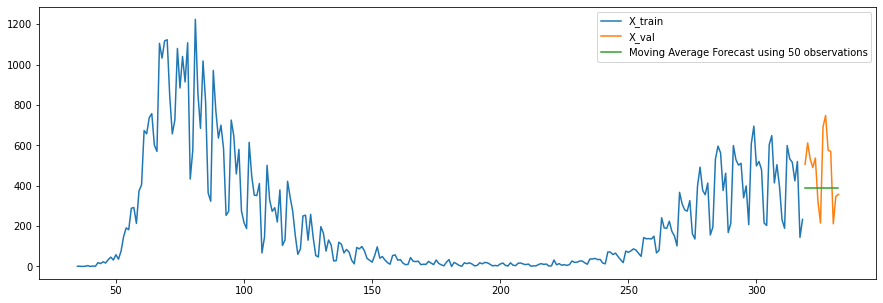

In [52]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [53]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.moving_avg_forecast)) 
print(rms)

183.01057299667534


In [54]:
train = X_train.append(X_val)
train

,index,ds,add1,y
0,53438,2020-01-31,2.0,NaN
1,53439,2020-02-01,0.0,NaN
2,53440,2020-02-02,0.0,NaN
3,53441,2020-02-03,6.0,NaN
4,53442,2020-02-04,0.0,NaN
...,...,...,...,...
328,53766,2020-12-24,39148.0,575.0
329,53767,2020-12-25,32803.0,570.0
330,53768,2020-12-26,34788.0,211.0
331,53769,2020-12-27,32493.0,347.0


In [55]:
#predict on X_test
y_hat_avg = X_test.copy()
y_hat_avg['moving_avg_forecast'] = train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations
y_hat_avg

,ds,add1,moving_avg_forecast
0,2021-01-01,41460.0,441.66
1,2021-01-02,41460.0,441.66
2,2021-01-03,41460.0,441.66
3,2021-01-04,41460.0,441.66
4,2021-01-05,41460.0,441.66
5,2021-01-06,41460.0,441.66
6,2021-01-07,41460.0,441.66
7,2021-01-08,41460.0,441.66
8,2021-01-09,41460.0,441.66
9,2021-01-10,41460.0,441.66


In [56]:
X_val.index.max()

332

In [57]:
list_num = []
index = X_val.index.max()
for i in range(len(X_test)):
  index = index + 1
  list_num.append(index)
list_num

[333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363]

In [58]:
X_test['index'] = list_num
X_test

,ds,add1,index
0,2021-01-01,41460.0,333
1,2021-01-02,41460.0,334
2,2021-01-03,41460.0,335
3,2021-01-04,41460.0,336
4,2021-01-05,41460.0,337
5,2021-01-06,41460.0,338
6,2021-01-07,41460.0,339
7,2021-01-08,41460.0,340
8,2021-01-09,41460.0,341
9,2021-01-10,41460.0,342


In [59]:
y_hat_avg['index'] = list_num
y_hat_avg

,ds,add1,moving_avg_forecast,index
0,2021-01-01,41460.0,441.66,333
1,2021-01-02,41460.0,441.66,334
2,2021-01-03,41460.0,441.66,335
3,2021-01-04,41460.0,441.66,336
4,2021-01-05,41460.0,441.66,337
5,2021-01-06,41460.0,441.66,338
6,2021-01-07,41460.0,441.66,339
7,2021-01-08,41460.0,441.66,340
8,2021-01-09,41460.0,441.66,341
9,2021-01-10,41460.0,441.66,342


In [60]:
y_hat_avg.set_index(['index'], inplace=True)
y_hat_avg

,ds,add1,moving_avg_forecast
index,,,
333,2021-01-01,41460.0,441.66
334,2021-01-02,41460.0,441.66
335,2021-01-03,41460.0,441.66
336,2021-01-04,41460.0,441.66
337,2021-01-05,41460.0,441.66
338,2021-01-06,41460.0,441.66
339,2021-01-07,41460.0,441.66
340,2021-01-08,41460.0,441.66
341,2021-01-09,41460.0,441.66


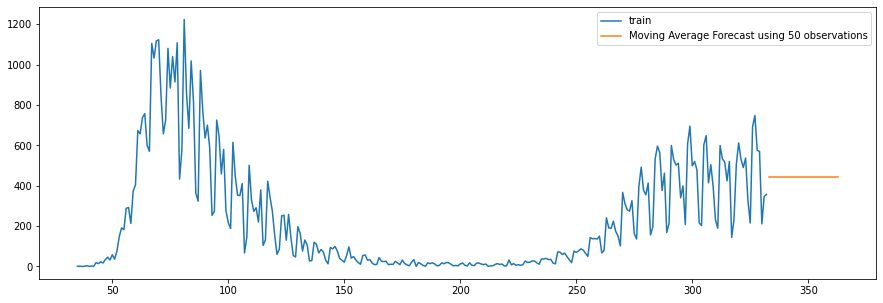

In [61]:
plt.figure(figsize=(15,5)) 
plt.plot(train['y'], label='train') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [62]:
#select last column from array
y_hat_avg.iloc[:,-1:] = y_hat_avg.iloc[:,-1:].astype(int)
print(y_hat_avg.iloc[:,-1:])

       moving_avg_forecast
index                     
333                    441
334                    441
335                    441
336                    441
337                    441
338                    441
339                    441
340                    441
341                    441
342                    441
343                    441
344                    441
345                    441
346                    441
347                    441
348                    441
349                    441
350                    441
351                    441
352                    441
353                    441
354                    441
355                    441
356                    441
357                    441
358                    441
359                    441
360                    441
361                    441
362                    441
363                    441


In [63]:
prediction = y_hat_avg.moving_avg_forecast

prediction[prediction < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-01-01,441
1,2021-01-02,441
2,2021-01-03,441
3,2021-01-04,441
4,2021-01-05,441
5,2021-01-06,441
6,2021-01-07,441
7,2021-01-08,441
8,2021-01-09,441
9,2021-01-10,441


Vector Auto Regression VAR

In [65]:
X_train = X_train.drop(['ds'],axis=1)
X_train

,index,add1,y
0,53438,2.0,NaN
1,53439,0.0,NaN
2,53440,0.0,NaN
3,53441,6.0,NaN
4,53442,0.0,NaN
...,...,...,...
314,53752,21066.0,516.0
315,53753,21784.0,424.0
316,53754,21554.0,520.0
317,53755,18541.0,144.0


In [66]:
X_train.fillna(0,inplace=True)
X_train

,index,add1,y
0,53438,2.0,0.0
1,53439,0.0,0.0
2,53440,0.0,0.0
3,53441,6.0,0.0
4,53442,0.0,0.0
...,...,...,...
314,53752,21066.0,516.0
315,53753,21784.0,424.0
316,53754,21554.0,520.0
317,53755,18541.0,144.0


In [67]:
X_val = X_val.drop(['ds'],axis=1)
X_val

,index,add1,y
319,53757,18569.0,506.0
320,53758,25300.0,612.0
321,53759,35532.0,532.0
322,53760,28560.0,490.0
323,53761,27249.0,537.0
324,53762,36084.0,326.0
325,53763,33517.0,215.0
326,53764,36931.0,691.0
327,53765,39387.0,748.0
328,53766,39148.0,575.0


In [68]:
X_test = X_test.drop(['ds'],axis=1)
X_test

,add1,index
0,41460.0,333
1,41460.0,334
2,41460.0,335
3,41460.0,336
4,41460.0,337
5,41460.0,338
6,41460.0,339
7,41460.0,340
8,41460.0,341
9,41460.0,342


In [69]:
from statsmodels.tsa.vector_ar.var_model import VAR

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model = VAR(X_train)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



[[53756 20239   242]
 [53757 20120   250]
 [53758 20015   256]
 [53759 19923   261]
 [53760 19844   264]
 [53761 19774   267]
 [53762 19715   269]
 [53763 19663   270]
 [53764 19620   270]
 [53765 19583   270]
 [53766 19553   270]
 [53767 19529   270]
 [53768 19509   269]
 [53769 19495   268]]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [70]:
index = yhat[:,0]

In [71]:
y_pred = yhat[:,2]

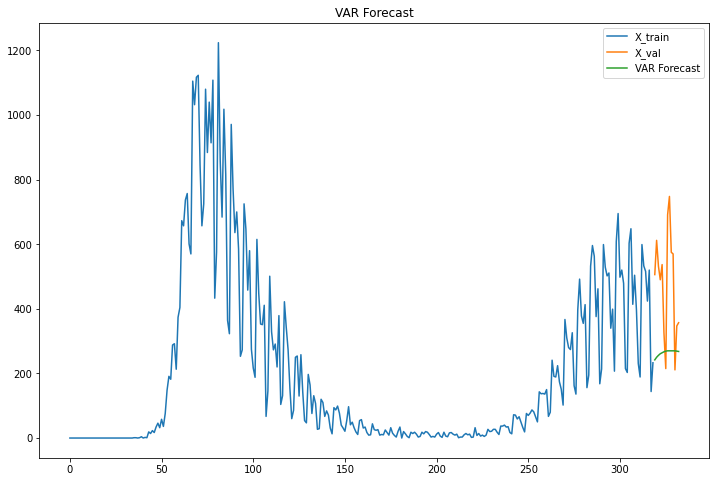

In [72]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,y_pred, label='VAR Forecast') 
plt.legend(loc='best') 
plt.title("VAR Forecast") 
plt.show()

In [73]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_pred)) 
print(rms)

269.4596444738989


Vector Moving Average

In [74]:
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(X_train, order=(0,1))
model_fit = model.fit(disp=False)
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
yhat

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,index,add1,y
319,53669,11524,620
320,53597,5877,202
321,53597,5877,202
322,53597,5877,202
323,53597,5877,202
324,53597,5877,202
325,53597,5877,202
326,53597,5877,202
327,53597,5877,202
328,53597,5877,202


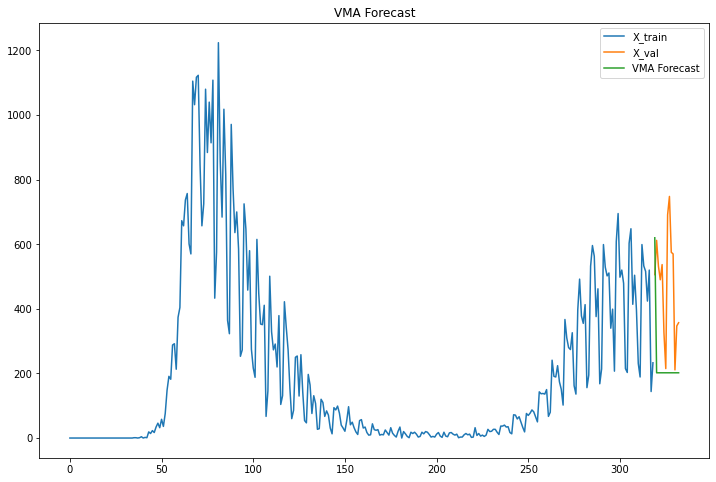

In [75]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VMA Forecast') 
plt.legend(loc='best') 
plt.title("VMA Forecast") 
plt.show()

In [76]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

311.4059133304036


Vector Autoregression Moving-Average (VARMA)

In [77]:
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
model = VARMAX(X_train, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.



     index   add1    y
319  53756  20180  242
320  53756  20000  249
321  53756  19834  255
322  53756  19681  259
323  53755  19540  263
324  53755  19408  265
325  53755  19285  266
326  53755  19170  267
327  53755  19063  268
328  53755  18962  268
329  53755  18867  267
330  53755  18778  267
331  53755  18693  266
332  53755  18613  265


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.



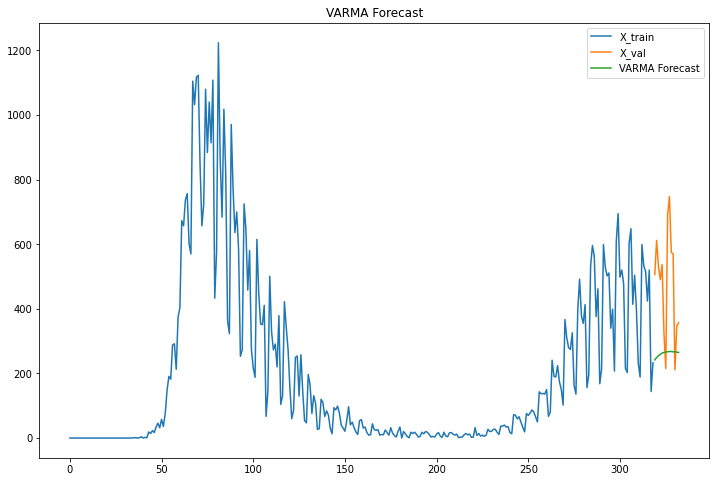

In [78]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VARMA Forecast') 
plt.legend(loc='best') 
plt.title("VARMA Forecast") 
plt.show()

In [79]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

270.89112203983353
